# Analysis of Foursquare Model Weight
# NYU - CUSP UDP Capstone
# Foursquare + NYC Merge by CT 
## Brief
This notebook 
1. Part I. Data Processing
    - import Models Weight
    - Plot top 10 most important weights for every model
    
###  You can refer to https://github.com/mv1742/updny_2

# Part I. Data Processing


In [2]:
import os
import requests
import shapely
import json

import matplotlib.pyplot as plt #plotting
import pandas as pd
import numpy as np
import scipy.stats as stat
#make sure plots are embedded into the notebook
%matplotlib inline
#import statsmodels.formula.api as smf
import itertools
import geopandas as gpd
from shapely.geometry import Point, Polygon
from sklearn.metrics import silhouette_score
# from sklearn.mixture import GaussianMixture
from scipy import linalg
import matplotlib as mpl
import pandas as pd
from sklearn import preprocessing
from scipy.cluster.hierarchy import dendrogram, linkage  # for hierarchical clustering
from scipy.cluster.hierarchy import fcluster
# from sklearn.mixture import GaussianMixture
from scipy import linalg
import matplotlib as mpl
import pandas as pd
from sklearn import preprocessing
from scipy.cluster.hierarchy import dendrogram, linkage  # for hierarchical clustering
from scipy.cluster.hierarchy import fcluster
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
import geopandas as gpd
import pylab as pl
import io
import pylab as pl

from geopandas import GeoDataFrame
from geopandas.tools import sjoin
try:
    import ipywidgets as widgets
    hasWidgets = True
except ImportError:
    hasWidgets = False
from sklearn.linear_model import LogisticRegression
from sklearn import svm
# from sklearn.metrics import confusion_matrix
# from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn import preprocessing
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
# from sklearn.metrics import precision_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, classification_report
import matplotlib.pylab
import sklearn.preprocessing as preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

%pylab inline

Populating the interactive namespace from numpy and matplotlib


/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/ADS/lib/python3.5/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['linalg', 'Polygon']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [3]:
weights_results = ['gent00_16.csv','Ongoing_adv_gent.csv',\
'pct_ch_hinc00_16.csv','pct_ch_medrent00_16.csv','pct_ch_medhval00_16.csv',\
'pct_ch_percol00_16.csv',
'Supergent16.csv']
weights_results

['gent00_16.csv',
 'Ongoing_adv_gent.csv',
 'pct_ch_hinc00_16.csv',
 'pct_ch_medrent00_16.csv',
 'pct_ch_medhval00_16.csv',
 'pct_ch_percol00_16.csv',
 'Supergent16.csv']

In [5]:
weights_df_list = []
for file in weights_results:
    print(file)
    temp = pd.read_csv('./Results/'+file)
    temp.rename(columns={'Unnamed: 0':'St_method'}, inplace=True)
    weights_df_list.append(temp)

gent00_16.csv
Ongoing_adv_gent.csv
pct_ch_hinc00_16.csv
pct_ch_medrent00_16.csv
pct_ch_medhval00_16.csv
pct_ch_percol00_16.csv
Supergent16.csv


In [6]:
binary_typs = []
for w in weights_results:
    print(w)
    binary_typs.append(w[:-4])
binary_typs

gent00_16.csv
Ongoing_adv_gent.csv
pct_ch_hinc00_16.csv
pct_ch_medrent00_16.csv
pct_ch_medhval00_16.csv
pct_ch_percol00_16.csv
Supergent16.csv


['gent00_16',
 'Ongoing_adv_gent',
 'pct_ch_hinc00_16',
 'pct_ch_medrent00_16',
 'pct_ch_medhval00_16',
 'pct_ch_percol00_16',
 'Supergent16']

In [10]:
weights_df_list[0].loc[0][1:].abs().sort_values(ascending=False)[:10].index[::-1]

Index(['Type_Residential Building (Apartment / Condo)_sum10', 'Checkins',
       'Class__sum10', 'Category_Unknown_sum10', 'popden00', 'Visits',
       'Rating_sum10', 'hinc00', 'unempden00', 'medhval00'],
      dtype='object')

In [11]:
top10_pd = pd.DataFrame()
for i, binary_target in enumerate(binary_typs):
    print(i, binary_target)
    for st_method in list(weights_df_list[i].index):
        print('st_method',st_method)
        pd_series_by_st_method = weights_df_list[i].loc[st_method]
        for k, variable in enumerate(pd_series_by_st_method[1:].abs().sort_values(ascending=False)[:10].index[::-1]):
            print(k,variable)
            top10_pd.loc[st_method,variable] = k
top10_pd

0 gent00_16
st_method 0
0 Type_Residential Building (Apartment / Condo)_sum10
1 Checkins
2 Class__sum10
3 Category_Unknown_sum10
4 popden00
5 Visits
6 Rating_sum10
7 hinc00
8 unempden00
9 medhval00
st_method 1
0 Type_Parking
1 Type_Watch Shop_sum10
2 Type_Lounge
3 Type_Athletics & Sports
4 unempden00
5 Type_Swiss Restaurant_sum10
6 Type_Ski Lodge_sum10
7 distance_to_Type_American Restaurant
8 carcommuters_00
9 per_rent_00
st_method 2
0 Type_Parking
1 Type_Watch Shop_sum10
2 Type_Lounge
3 Type_Athletics & Sports
4 unempden00
5 Type_Swiss Restaurant_sum10
6 Type_Ski Lodge_sum10
7 distance_to_Type_American Restaurant
8 carcommuters_00
9 per_rent_00
st_method 3
0 Type_Spiritual Center
1 Type_Optical Shop
2 Type_Discount Store
3 distance_to_Type_Bar
4 pag25up00
5 per_rent_00
6 hinc00
7 Type_Other Great Outdoors
8 Type_Other Event
9 percol00
st_method 4
0 Type_Paper / Office Supplies Store
1 Type_Arcade
2 distance_to_Type_Spanish Restaurant
3 Type_Automotive Shop
4 distance_to_Class_Optional

5 distance_to_Category_Income
6 per_rent_00
7 popden00
8 medrent00
9 Type_Boat Rental_sum10
st_method 10
0 Type_College Residence Hall
1 distance_to_Type_French Restaurant
2 Type_Public Bathroom_sum10
3 Category_Leisure_sum10
4 Type_Convenience Store
5 distance_to_Category_Income
6 per_rent_00
7 popden00
8 medrent00
9 Type_Boat Rental_sum10
st_method 11
0 Type_University
1 distance_to_Category_Leisure
2 hinc00
3 distance_to_Type_Juice Bar
4 Type_Alternative Healer
5 Type_Shop & Service
6 pop00
7 distance_to_Type_Fried Chicken Joint
8 Type_Medical School
9 medrent00
4 pct_ch_medhval00_16
st_method 0
0 Users
1 Class_Optional_sum10
2 Rating_sum10
3 Category_Taking care_sum10
4 Category_Personal care_sum10
5 Checkins
6 Category_Leisure_sum10
7 Visits
8 hinc00
9 medhval00
st_method 1
0 Type_Greek Restaurant
1 Type_Flower Shop
2 Type_Smoke Shop
3 Type_Synagogue
4 Type_Art Gallery
5 distance_to_Category_Nutrition
6 distance_to_Category_Leisure
7 distance_to_Type_Cocktail Bar
8 Type_Tour Provi

,Type_Residential Building (Apartment / Condo)_sum10,Checkins,Class__sum10,Category_Unknown_sum10,popden00,Visits,Rating_sum10,hinc00,unempden00,medhval00,...,Type_Pedestrian Plaza,TOD,Type_Buffet,distance_to_Category_Social,Type_Flight School_sum10,Type_Museum,Type_Storage Facility,Type_Modern European Restaurant_sum10,Type_Auto Dealership,phisp00
0,7.0,7.0,1.0,2.0,4.0,8.0,6.0,5.0,9.0,9.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,3.0,NaN,NaN,NaN,7.0,NaN,NaN,9.0,4.0,9.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3.0,NaN,NaN,NaN,7.0,NaN,4.0,9.0,4.0,9.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.0,NaN,9.0,...,1.0,2.0,3.0,6.0,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.0,NaN,9.0,...,NaN,NaN,NaN,7.0,1.0,4.0,6.0,8.0,NaN,NaN
5,3.0,NaN,NaN,NaN,7.0,NaN,4.0,9.0,NaN,9.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,7.0
6,3.0,NaN,NaN,NaN,7.0,NaN,4.0,9.0,4.0,9.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.0,NaN,9.0,...,1.0,2.0,3.0,6.0,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.0,NaN,9.0,...,1.0,2.0,3.0,6.0,NaN,NaN,NaN,NaN,NaN,NaN
9,3.0,NaN,NaN,NaN,7.0,NaN,4.0,9.0,4.0,9.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
print(weights_results[3])
st_method = 8
print(st_method, (weights_df_list[3].loc[st_method][0]))
weights_df_list[3].loc[st_method][1:].abs().sort_values(ascending=False)[:10].index[::-1]

pct_ch_medrent00_16.csv
8 Logit_Minmaxed


Index(['Type_University', 'distance_to_Category_Leisure', 'hinc00',
       'distance_to_Type_Juice Bar', 'Type_Alternative Healer',
       'Type_Shop & Service', 'pop00', 'distance_to_Type_Fried Chicken Joint',
       'Type_Medical School', 'medrent00'],
      dtype='object')

medhval00                               108.0
hinc00                                  104.0
percol00                                 99.0
medrent00                                93.0
carcommuters_00                          79.0
distance_to_Type_American Restaurant     74.0
per_rent_00                              64.0
Type_Boat Rental_sum10                   54.0
pag25up00                                52.0
Type_Tour Provider_sum10                 48.0
dtype: float64


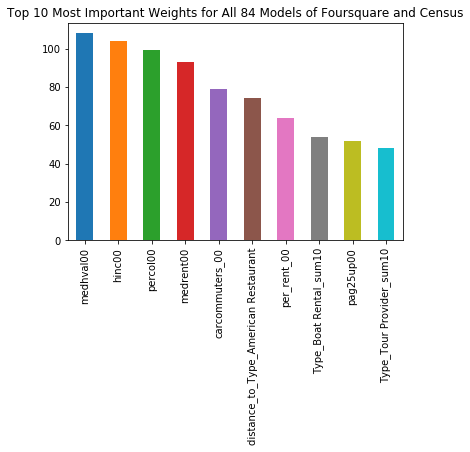

In [17]:
print(top10_pd.sum(axis=0).sort_values(ascending=False)[:10])
top10_pd.sum(axis=0).sort_values(ascending=False)[:10].plot(kind='bar', title = 'Top 10 Most Important Weights for All 84 Models of Foursquare and Census')

In [52]:
# top10_pd = pd.DataFrame():
# for binary_variable in binary_variables:
#     top10_pd[binary_variable] = weights_df[0].loc[0][1:].abs().sort_values(ascending=False)[:10].index

Index(['Rating_sum10', 'Class_Optional_sum10', 'Visits',
       'Class_Necessary_sum10', 'Checkins', 'Category_Unknown_sum10',
       'Class__sum10', 'Users', 'Category_Consumption_sum10',
       'Category_Nutrition_sum10'],
      dtype='object')